# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

This notebook explores Dandiset 000617, an Allen Institute Openscope project investigating sequence learning using two-photon calcium imaging in mice.

**Note:** This notebook was generated by an AI assistant and has not been fully verified. Please exercise caution when interpreting the code or results and consider consulting the official Dandiset documentation for definitive information.

## Dandiset Overview

This Dandiset contains data from a sequence learning experiment where head-fixed mice viewed sequences of natural movie clips while undergoing two-photon calcium imaging of neuron activity in visual cortex. The experiment aims to investigate how the brain predicts upcoming stimuli in a sequence.

You can find more information about this Dandiset on the DANDI archive: [https://dandiarchive.org/dandiset/000617/0.250312.0130](https://dandiarchive.org/dandiset/000617/0.250312.0130)

## Notebook Contents

This notebook will cover:
- Loading basic Dandiset information.
- Listing the assets (files) within the Dandiset.
- Loading data from a selected NWB file.
- Exploring and visualizing a subset of key data streams within the NWB file, including:
    - dF/F traces (a measure of neural activity)
    - Running speed of the animal
    - Stimulus presentation timing

## Required Packages

This notebook requires the following Python packages to be installed in your environment:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `pandas`

## Loading Dandiset Information

We can use the `dandiapi` library to connect to the DANDI archive and retrieve information about the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130

First 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (ID: 4cfa15bb-eac7-4273-9141-6d0cc2034506)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (ID: d0b9a557-2c98-4fbc-af96-2318e6e5f2eb)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (ID: 6b8f9ba6-2481-4c7b-b78c-38c2b878d246)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (ID: c407d5e4-9431-4f94-b5d0-2b28069fa244)


## Loading Data from an NWB File

This Dandiset contains numerous NWB files. For this exploration, we will focus on one of the smaller NWB files which likely contains
processed data rather than raw imaging data.

We will load the file at the following path:
`sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb`

The direct download URL for this asset (derived from its asset ID) is:
`https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/`

We can use `pynwb`, `h5py`, and `remfile` to efficiently stream data from this remote NWB file without downloading the entire file.

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Successfully loaded NWB file.")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")

Successfully loaded NWB file.
Session Description: Ophys Session
Identifier: 1280384858
Session Start Time: 2023-06-30 16:04:51.055000+00:00


## NWB File Contents Summary

This NWB file contains various data streams related to the experiment. Based on the file structure, key data interfaces include:

*   **acquisition**: Contains raw acquired data such as voltage signals from a running wheel (`v_in`, `v_sig`).
*   **stimulus_template**: Contains the templates for the presented stimuli (e.g., `gray`, `movie_clip_A`, `movie_clip_B`, `movie_clip_C`).
*   **processing**: Contains processed data organized into modules:
    *   `ophys`: Ophys processing results, including:
        *   `corrected_fluorescence`: Corrected fluorescence traces.
        *   `dff`: Delta F/F (dF/F) traces, a common measure of neural activity.
        *   `event_detection`: Detected calcium events.
        *   `image_segmentation`: Information about segmented regions of interest (ROIs), including their masks and a cell specimen table.
        *   `images`: Processed images like average and maximum projections.
        *   `neuropil_trace`: Neuropil fluorescence traces.
        *   `ophys_motion_correction_x`, `ophys_motion_correction_y`: Motion correction data.
    *   `running`: Processed running wheel data, including `dx` (angular change) and `speed`.
*   **intervals**: Contains time intervals for different events, such as stimulus presentations (`gray_presentations`, `movie_clip_A_presentations`, etc.).
*   **subject**: Information about the experimental subject (mouse).

## Exploring dF/F Traces

The dF/F traces provide insight into the calcium activity of segmented neurons (ROIs). We can load a subset of these traces and visualize them over time.

**Note:** There was difficulty retrieving unique identifiers for each ROI for the plot legend. The legend labels may not accurately reflect which trace corresponds to which ROI. This is an area for further investigation.

Attempted to retrieve cell specimen IDs: [-1, -1, -1, -1, -1]


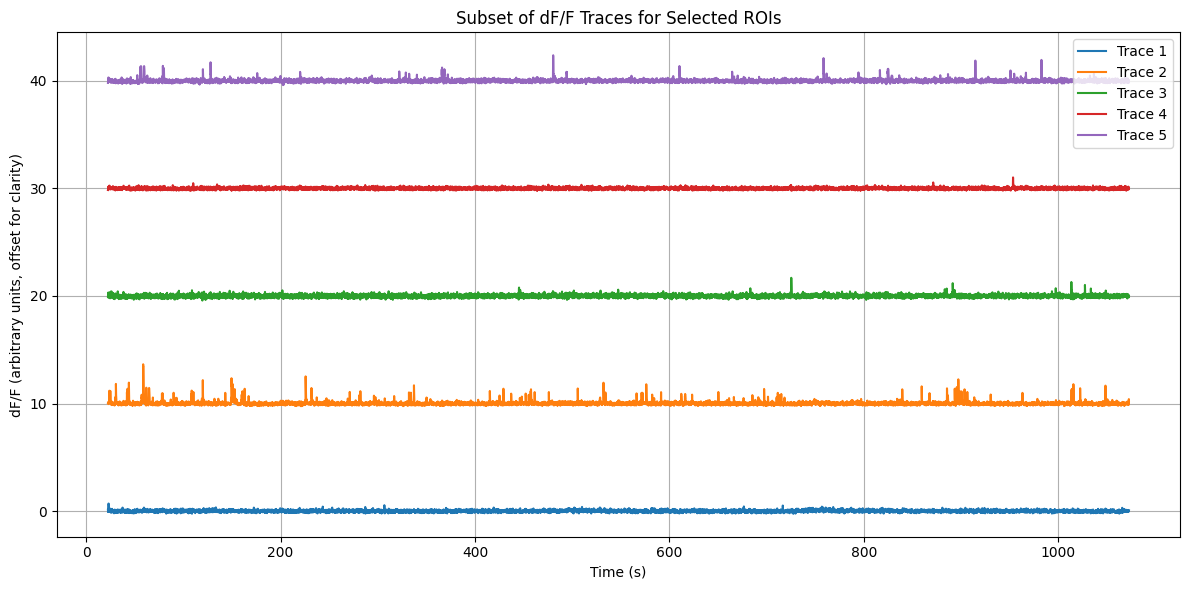

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Access the dF/F traces and timestamps
# Path: processing/ophys/dff/roi_response_series/traces
dff_traces_dataset = nwb.processing['ophys']['dff'].roi_response_series['traces'].data
timestamps_dataset = nwb.processing['ophys']['dff'].roi_response_series['traces'].timestamps

# Load a subset of data for demonstration
num_time_points = 10000
num_rois = 5

dff_subset = dff_traces_dataset[0:num_time_points, 0:num_rois]
timestamps_subset = timestamps_dataset[0:num_time_points]

# Load ROI information to attempt to get cell specimen IDs (encountered issues with reliable access for legend)
# Path: processing/ophys/image_segmentation/plane_segmentations/cell_specimen_table
try:
    roi_table = nwb.processing['ophys']['image_segmentation'].plane_segmentations['cell_specimen_table'].to_dataframe()
    # Attempt to get cell specimen IDs - note: encountered issues with reliable access for legend labeling
    cell_specimen_ids = roi_table['cell_specimen_id'].iloc[0:num_rois].tolist()
    print(f"Attempted to retrieve cell specimen IDs: {cell_specimen_ids}")
except Exception as e:
    print(f"Could not retrieve cell specimen IDs for legend: {e}")
    cell_specimen_ids = [f"ROI {i+1}" for i in range(num_rois)] # Fallback labels


# Plot the traces
plt.figure(figsize=(12, 6))
for i in range(num_rois):
     # Using simple index for label due to difficulty with cell_specimen_id
    plt.plot(timestamps_subset, dff_subset[:, i] + i * 10, label=f'Trace {i+1}') # Offset traces for clarity

plt.xlabel('Time (s)')
plt.ylabel('dF/F (arbitrary units, offset for clarity)')
plt.title('Subset of dF/F Traces for Selected ROIs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Exploring Running Speed

The running speed data captures the animal's movement during the experiment, which can be correlated with neural activity.

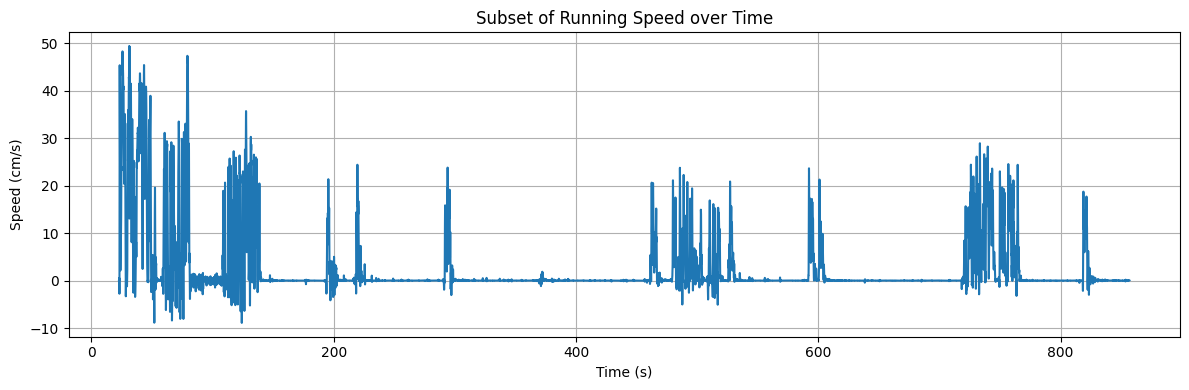

In [4]:
# Access the running speed data and timestamps
# Path: processing/running/speed
speed_dataset = nwb.processing['running']['speed'].data
speed_timestamps_dataset = nwb.processing['running']['speed'].timestamps

# Load a subset of data
num_time_points = 50000

speed_subset = speed_dataset[0:num_time_points]
speed_timestamps_subset = speed_timestamps_dataset[0:num_time_points]

# Plot the running speed
plt.figure(figsize=(12, 4))
plt.plot(speed_timestamps_subset, speed_subset)
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.title('Subset of Running Speed over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## Exploring Stimulus Presentation Intervals

Understanding the timing of stimulus presentations is crucial for relating neural and behavioral data to the experimental paradigm. We can visualize the intervals when specific stimuli were shown.

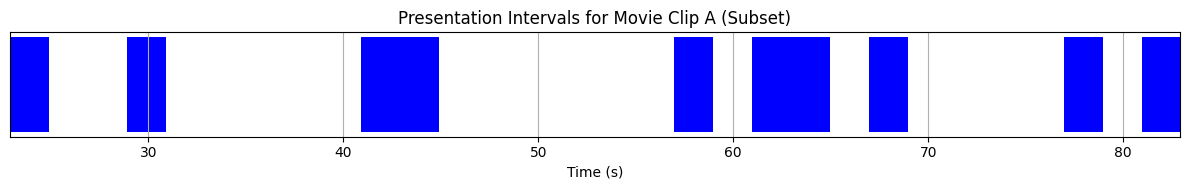

In [5]:
# Access the stimulus presentation intervals for movie_clip_A
# Path: intervals/movie_clip_A_presentations
# We convert to a dataframe for easier access
try:
    stimulus_intervals_table = nwb.intervals['movie_clip_A_presentations'].to_dataframe()

    # Get the start and stop times
    start_times = stimulus_intervals_table['start_time'].values
    stop_times = stimulus_intervals_table['stop_time'].values

    # Plot the intervals
    plt.figure(figsize=(12, 2))
    for start, stop in zip(start_times, stop_times):
        plt.barh(y=[0], width=stop - start, left=start, height=1, color='blue', edgecolor='none')

    plt.xlabel('Time (s)')
    plt.yticks([]) # Hide y-axis ticks
    plt.title('Presentation Intervals for Movie Clip A (Subset)')
    # Show only a portion of the timeline for clarity
    if len(start_times) > 0:
        plt.xlim([start_times[0], start_times[0] + 60])
    plt.grid(True)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not plot stimulus intervals table: {e}")
    print("Please verify the path 'intervals/movie_clip_A_presentations' exists and contains data.")

## Summary and Future Directions

This notebook provided a basic introduction to accessing and exploring the data within Dandiset 000617. We demonstrated how to load Dandiset information, list assets, and load a specific NWB file to visualize samples of dF/F traces, running speed, and stimulus presentation intervals.

**Key observations:**
- The dF/F traces show varying levels of activity across selected ROIs.
- The running speed plot indicates periods of both activity and rest for the animal.
- The stimulus interval plot clearly shows the timing of movie clip presentations.

**Potential future directions for analysis include:**
- Investigating the relationship between running speed and neural activity.
- Analyzing neural responses to different stimulus types.
- Exploring detected calcium events (`event_detection`).
- Utilizing the image segmentation data to visualize ROI locations.
- Analyzing longer segments of data or additional NWB files from the Dandiset.
- Consulting the Dandiset's accompanying documentation for detailed experimental procedures and data descriptions.

In [6]:
# Close the NWB file
# This is important for releasing resources
if 'io' in locals() and io and h5_file:
    try:
        io.close()
        print("\nNWB file closed.")
    except Exception as e:
        print(f"\nError closing NWB file: {e}")
elif 'nwb' in locals() and nwb:
     # If file was opened without h5_file and io objects
     try:
         nwb.close()
         print("\nNWB file closed.")
     except Exception as e:
         print(f"\nError closing NWB file: {e}")


NWB file closed.
